In [500]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fc-dp.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

season = 11
# df = df[df['season'] == season]
df = df[df["event_type"] != "DP"]
df = df[df["baserunner_count"] == 1]
len(df)

3592

In [501]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0

for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])
for attr in [
    "runner_on_first_buoyancy",
    "runner_on_first_divinity",
    "runner_on_first_martyrdom",
    "runner_on_first_moxie",
    "runner_on_first_musclitude",
    "runner_on_first_patheticism",
    "runner_on_first_thwackability",
    "runner_on_first_tragicness",
    "runner_on_first_coldness",
    "runner_on_first_overpowerment",
    "runner_on_first_ruthlessness",
    "runner_on_first_shakespearianism",
    "runner_on_first_suppression",
    "runner_on_first_unthwackability",
    "runner_on_first_base_thirst",
    "runner_on_first_continuation",
    "runner_on_first_ground_friction",
    "runner_on_first_indulgence",
    "runner_on_first_laserlikeness",
    "runner_on_first_anticapitalism",
    "runner_on_first_chasiness",
    "runner_on_first_omniscience",
    "runner_on_first_tenaciousness",
    "runner_on_first_watchfulness",
    "runner_on_first_pressurization",
    "runner_on_first_cinnamon",
]:
    df[attr] = df[attr] * df["runner_on_first_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_times_vibe"] = df[attr] * df["fielder_vibes"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

/tmp/ipykernel_288119/2953195063.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
/tmp/ipykernel_288119/2953195063.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
/tmp/ipykernel_288119/2953195063.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [502]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[
    (dfc["pitcher_multiplier"] == 1)
    & (dfc["batter_multiplier"] == 1)
    & (dfc["fielder_multiplier"] == 1)
    & (dfc["runner_on_first_multiplier"] == 1)
]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

2106

In [503]:
# dfc.corr()['offset'].sort_values()

In [504]:
X = dfc[
    [
        "roll",
        "passed",
        "batter_martyrdom_with_vibe",
        "ballpark_elongation",
        "runner_on_first_base_thirst",
        # "runner_on_first_continuation",
        # "runner_on_first_indulgence",
        # "fielder_chasiness_with_vibe",
        # "fielder_omniscience_with_vibe",
    ]
]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X["passed"]
X = X.drop("passed", axis=1)
X

,roll,batter_martyrdom_with_vibe,ballpark_elongation,runner_on_first_base_thirst
0,0.596463,1.260670,0.500000,1.011298
2,0.718377,0.950406,0.500000,0.961669
3,0.601151,1.575149,0.500000,0.161061
5,0.421272,0.468356,0.500000,0.331329
7,0.491700,0.000869,0.500000,0.339482
...,...,...,...,...
5487,0.859228,0.387227,0.485544,0.385006
5495,0.970198,1.074445,0.557553,0.386836
5502,0.705552,0.294342,0.436543,0.264727
5503,0.411751,0.943324,0.557553,0.488397


In [505]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
    X2, y
)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[1620   24]
 [   4  458]]
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      1644
        True       0.95      0.99      0.97       462

    accuracy                           0.99      2106
   macro avg       0.97      0.99      0.98      2106
weighted avg       0.99      0.99      0.99      2106

0.9867046533713201


In [506]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.04088739]


[(1.0, 'roll'),
 (-0.2430931525129551, 'batter_martyrdom_with_vibe'),
 (-0.05901476341162057, 'ballpark_elongation'),
 (0.011890379922028078, 'runner_on_first_base_thirst')]

[0.04088739]
(0.2430931525129551, 'batter_martyrdom_with_vibe')
(0.05901476341162057, 'ballpark_elongation')
(-0.011890379922028078, 'runner_on_first_base_thirst')


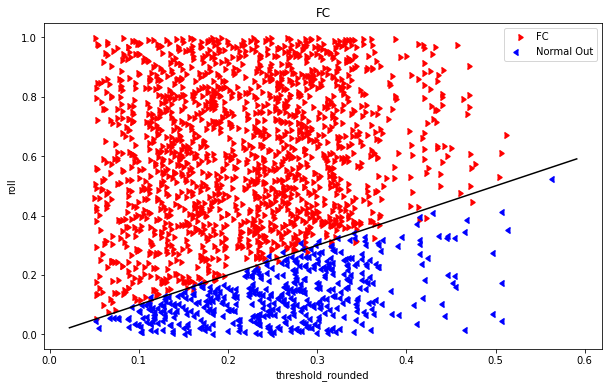

In [498]:
dfc["threshold_rounded"] = 0.0 + (0.25 * dfc["batter_martyrdom_with_vibe"] + 0.1 * dfc["ballpark_elongation"])

dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]

# x_val = "day"
x_val = "threshold_rounded"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll"],
    color="red",
    label="FC",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll"],
    color="blue",
    label="Normal Out",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title("FC")
# ax.set_xlim(0.484, 0.499)
# ax.set_ylim(0, 1)

ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()

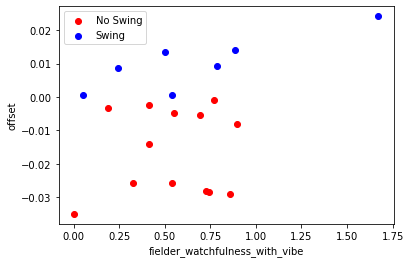

In [499]:
dfc["offset"] = dfc["roll"] - dfc["threshold_rounded"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "fielder_watchfulness_with_vibe"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="No Swing",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Swing",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

In [474]:
table = outliers
print(len(table))
table[
    [
        "offset",
        "roll",
        "threshold",
        "event_type",
        "baserunner_count",
        "top_of_inning",
        "inning",
        "event_type",
        "batter_vibes",
        "pitcher_vibes",
        "ballpark_viscosity",
        "batter_musclitude",
        "batter_name",
        "pitcher_name",
        "batter_mods",
        "pitcher_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "day",
        "game_id",
        "play_count",
    ]
].sort_values("offset", ascending=False)
# len(table)

20


,offset,roll,threshold,event_type,baserunner_count,top_of_inning,inning,event_type,batter_vibes,pitcher_vibes,...,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
3477,0.024151,0.308738,0.299437,Out,1,True,0,Out,-0.690521,0.236196,...,0.797885,Cannonball Sports,Lars Taylor,NaN,SWIM_BLADDER,LIFE_OF_PARTY;ELECTRIC,BASE_INSTINCTS,88,6bcc142b-0886-4dc5-8686-dcd63d7248df,17
1331,0.013990,0.262527,0.257856,Out,1,False,8,Out,-0.670033,0.162662,...,0.185702,Bees Taswell,Henry Marshallow,NaN,NaN,MAINTENANCE_MODE,AFFINITY_FOR_CROWS,20,581d9914-596a-4bf2-a5d8-8db7043b8d61,266
633,0.013519,0.277118,0.277488,Out,1,True,0,Out,-0.510649,0.649182,...,0.164337,Lawrence Horne,Sixpack Santiago,NaN,NaN,PARTY_TIME,LIFE_OF_PARTY;ELECTRIC;PARTY_TIME,96,cd7f1516-d046-4841-a963-14b54318dcc7,10
1218,0.009392,0.313959,0.314182,Out,1,True,7,Out,-0.307935,0.718935,...,0.698159,Yusef Fenestrate,Caleb Alvarado,NaN,FRIEND_OF_CROWS,NaN,NaN,17,40ca31c2-1756-47ec-acdb-d0d333948b75,244
2513,0.008603,0.124270,0.134656,Out,1,True,1,Out,-0.259291,1.368569,...,1.001760,Andrew Solis,Ruslan Greatness,FIRE_EATER,FRIEND_OF_CROWS,BIRD_SEED,AFFINITY_FOR_CROWS,38,0ea7896e-81fc-4113-baa5-65abadf5af9d,44
4606,0.000583,0.301734,0.314491,Out,1,True,8,Out,-0.301958,-0.228293,...,0.381473,Vessalius Sundae,Sexton Wheerer,NaN,ALTERNATE;SUPERALLERGIC;FRIEND_OF_CROWS,BOTTOM_DWELLER,NaN,44,5b2cdd25-f10a-4fe4-9dd0-c3b943ee21c4,280
4409,0.000469,0.170774,0.187238,Out,1,False,1,Out,-0.871741,0.301770,...,0.669586,Math Velazquez,Yummy Elliott,ALTERNATE;COFFEE_RALLY,NaN,NaN,NaN,41,69641cab-246f-4f6a-ad29-fbd73e394f98,45
3160,-0.000885,0.182155,0.183794,FC,1,True,3,FC,0.292934,0.211733,...,0.501089,Eugenia Bickle,Cudi Di Batterino,ALTERNATE,NaN,BASE_INSTINCTS,POPCORN_PAYOUTS,79,12a10664-b0d2-4f45-b7ca-4c48d42c109b,111
1934,-0.002326,0.227879,0.245329,FC,1,True,0,FC,0.164535,-0.269589,...,0.794285,Yeong-Ho Garcia,Coolname Galvanic,ALTERNATE;FRIEND_OF_CROWS,NaN,NaN,POPCORN_PAYOUTS,44,a862fd2d-b36b-4ea0-9542-4e8762b32782,14
4535,-0.003325,0.310077,0.313717,FC,1,True,3,FC,0.425032,0.807025,...,0.855190,Fitzgerald Blackburn,Wyatt Owens,NaN,NaN,NaN,LIFE_OF_PARTY;ELECTRIC,43,45c73e57-3a02-463a-8fdf-efb7879e9ea7,159


In [475]:
list(df.columns)

['event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'runner_on_first_buoyancy',
 'runner_on_first_divinity',
 'runner_on_first_martyrdom',
 'runner_on_first_moxie',
 'runner_on_first_musclitude',
 'runner_on_first_patheticism',
 'runner_on_first_thwackability',
 'runner_on_first_tragicness',
 'runner_on_first_coldness',
 'runner_on_first_overpowerment',
 'runner_on_first_ruthlessness',
 '

In [476]:
dfc['runner_on_first_vibes']

0       0.355904
2      -0.270328
3       0.523808
5      -0.039609
7       0.419453
          ...   
5487    0.717848
5495   -0.194319
5502    0.485907
5503    0.857728
5515    0.000000
Name: runner_on_first_vibes, Length: 2106, dtype: float64